In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from pyvis.network import Network

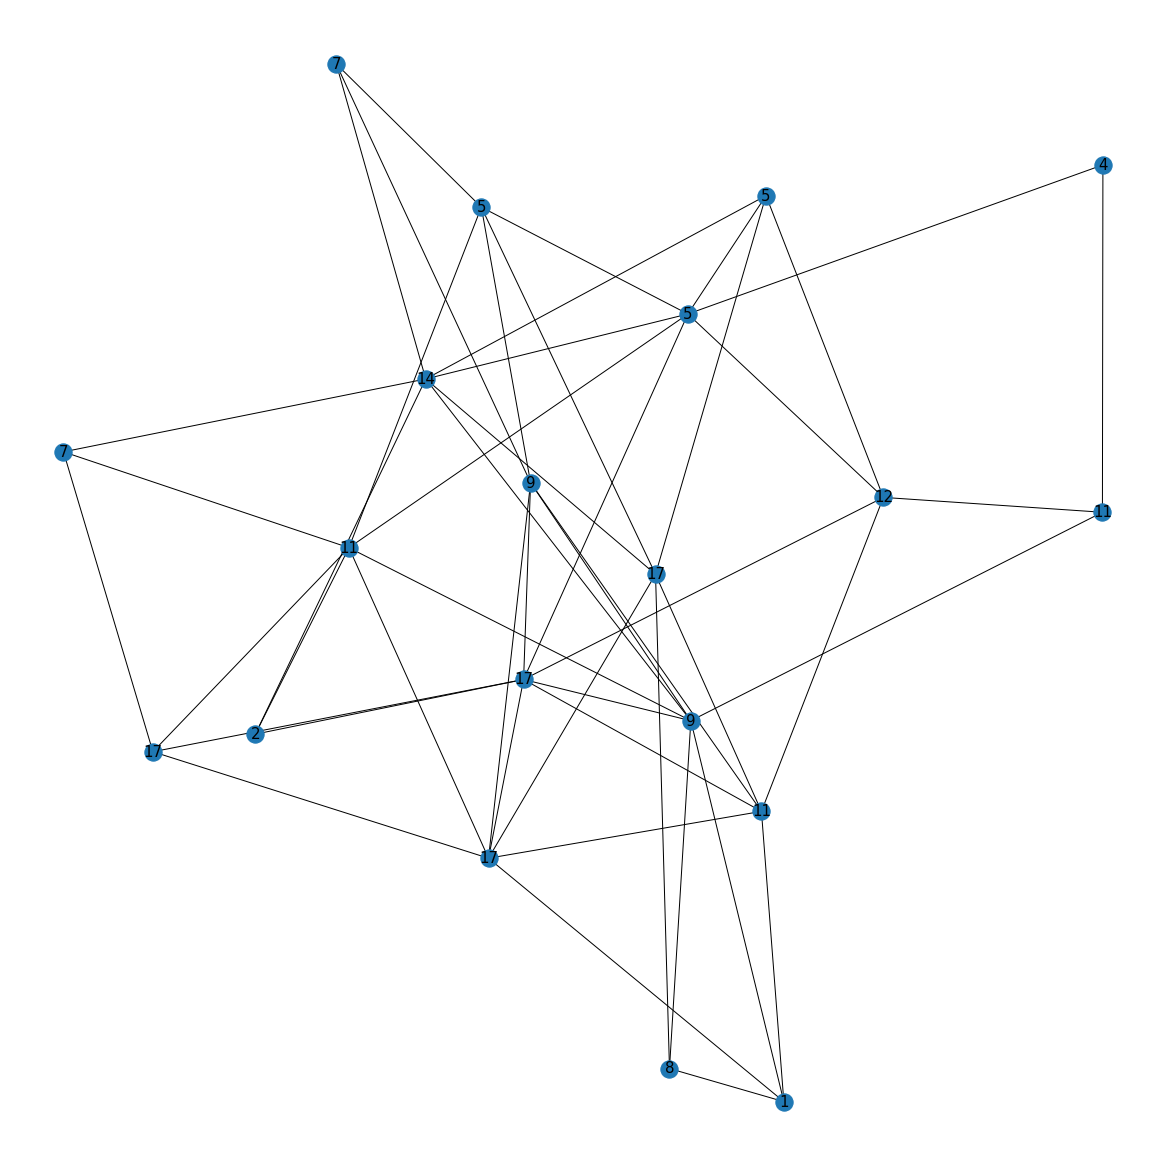

In [73]:
G = nx.gnm_random_graph(20, 50)

attrs = {}
for i in range(len(G.nodes(data=True))):
    attrs[i] = {"weight": random.randint(0,17)}
nx.set_node_attributes(G, attrs)

plt.figure(3,figsize=(16,16)) 
pos = nx.spring_layout(G)

nx.draw(G, pos)

_labels = nx.get_node_attributes(G,'weight')
nx.draw_networkx_labels(G, pos, labels = _labels, font_size = 15)


plt.show()

In [74]:
epicenter1 = random.randint(0,19)
G.nodes[epicenter1]['weight'] = 10

epicenter2 = random.randint(0,19)
G.nodes[epicenter2]['weight'] = 10

print("Эпицентр 1: " + str(epicenter1) + "\nЭпицентр 2: " + str(epicenter2)) 

Эпицентр 1: 1
Эпицентр 2: 15


In [69]:
def structural_destruction(G):

    n = 2
    adjacent = [[] for i in range(n)]
    epicenters = []

    for node in G.nodes(data='weight'):
        if node[1] >= 10:
                epicenters.append(node[0])
    for edge in G.edges():
        for i in range(len(epicenters)):
            print(len(epicenters))
            if epicenters[i] == edge[0]:
                adjacent[i].append(edge[1])
            if epicenters[i] == edge[1]:
                adjacent[i].append(edge[0])

    for node in epicenters:
        G.remove_node(node)
        for i in range(len(adjacent)):
            try:
                adjacent[i].remove(node)
            except:
                pass

    for i in range(len(adjacent)):
        try:
            increment = round(10/len(adjacent[i]), 2)
        except ZeroDivisionError:
            pass
        for node in adjacent[i]:
            G.nodes[node]['weight'] += increment
    for node in G.nodes(data="weight"):
        if node[1] >= 10:
            structural_destruction(G)
    print(G.nodes(data='weight'))

In [68]:
print("Процесс структурного разрушения графа: ")
structural_destruction(G)

Процесс структурного разрушения графа: 
[(1, 12.29), (2, 13.29), (3, 11.29), (4, 18.29), (5, 14.29), (6, 5.11), (7, 9.29), (8, 14.29), (9, 10.29), (10, 2.29), (11, 5.29), (12, 12.29), (13, 3.29), (14, 11.29), (16, 2.29), (17, 15.29), (18, 13.29), (19, 9.29)]
